# ***SALES PREDICTION USING PYTHON***


---



In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [29]:
sales = pd.read_csv("advertising.csv")

In [30]:
sales

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [31]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# **Exploratory Data Analysis - EDA**

In [32]:
sales.describe().round(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.98,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


In [6]:
sales.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [33]:
#Check for null or empty values
sales.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

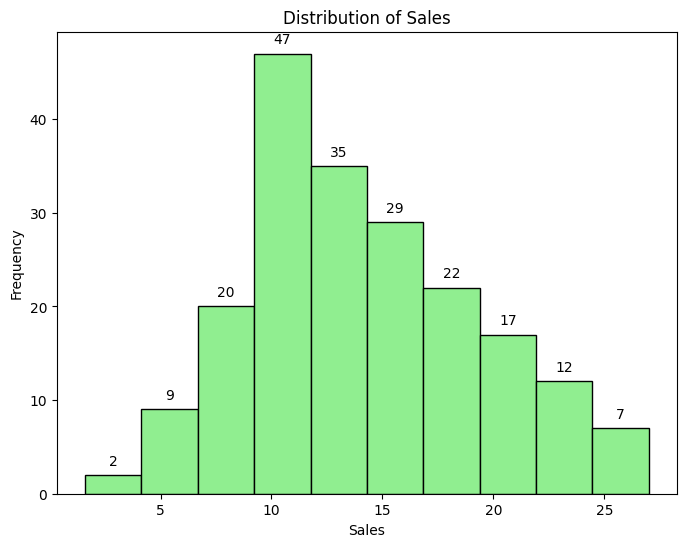

In [34]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

counts, bins, patches = plt.hist(sales['Sales'], bins=10, color='lightgreen', edgecolor='black')

bin_centers = 0.5 * np.diff(bins) + bins[:-1]

# Add count labels to the bars
for count, bin_center in zip(counts, bin_centers):
    plt.annotate(str(int(count)), xy=(bin_center, count), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')


plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')

plt.show()

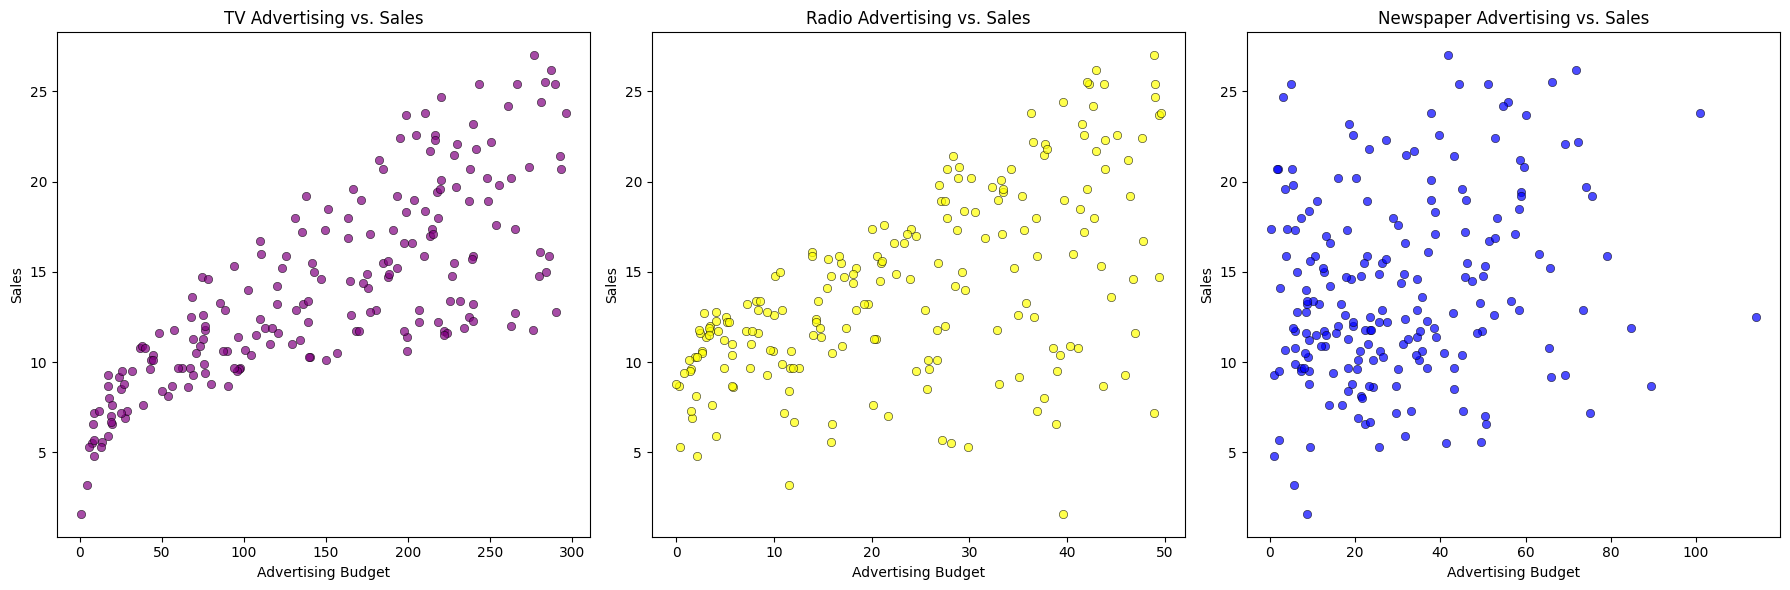

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=sales, x='TV', y='Sales', color='purple', edgecolor='black', alpha=0.7, ax=axes[0])
axes[0].set_title('TV Advertising vs. Sales')

sns.scatterplot(data=sales, x='Radio', y='Sales', color='yellow', edgecolor='black', alpha=0.7, ax=axes[1])
axes[1].set_title('Radio Advertising vs. Sales')

sns.scatterplot(data=sales, x='Newspaper', y='Sales', color='blue', edgecolor='black', alpha=0.7, ax=axes[2])
axes[2].set_title('Newspaper Advertising vs. Sales')


for ax in axes:
    ax.set_xlabel('Advertising Budget')
    ax.set_ylabel('Sales')

plt.tight_layout()

plt.show()

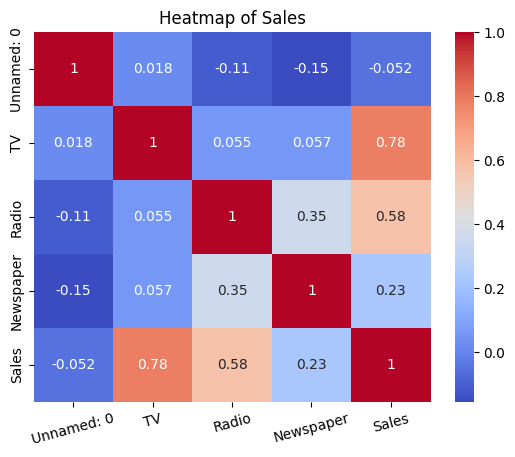

In [36]:
sns.heatmap(sales.corr(),  annot=True, cmap='coolwarm')

plt.xticks(rotation=15)
plt.title("Heatmap of Sales")

plt.show()

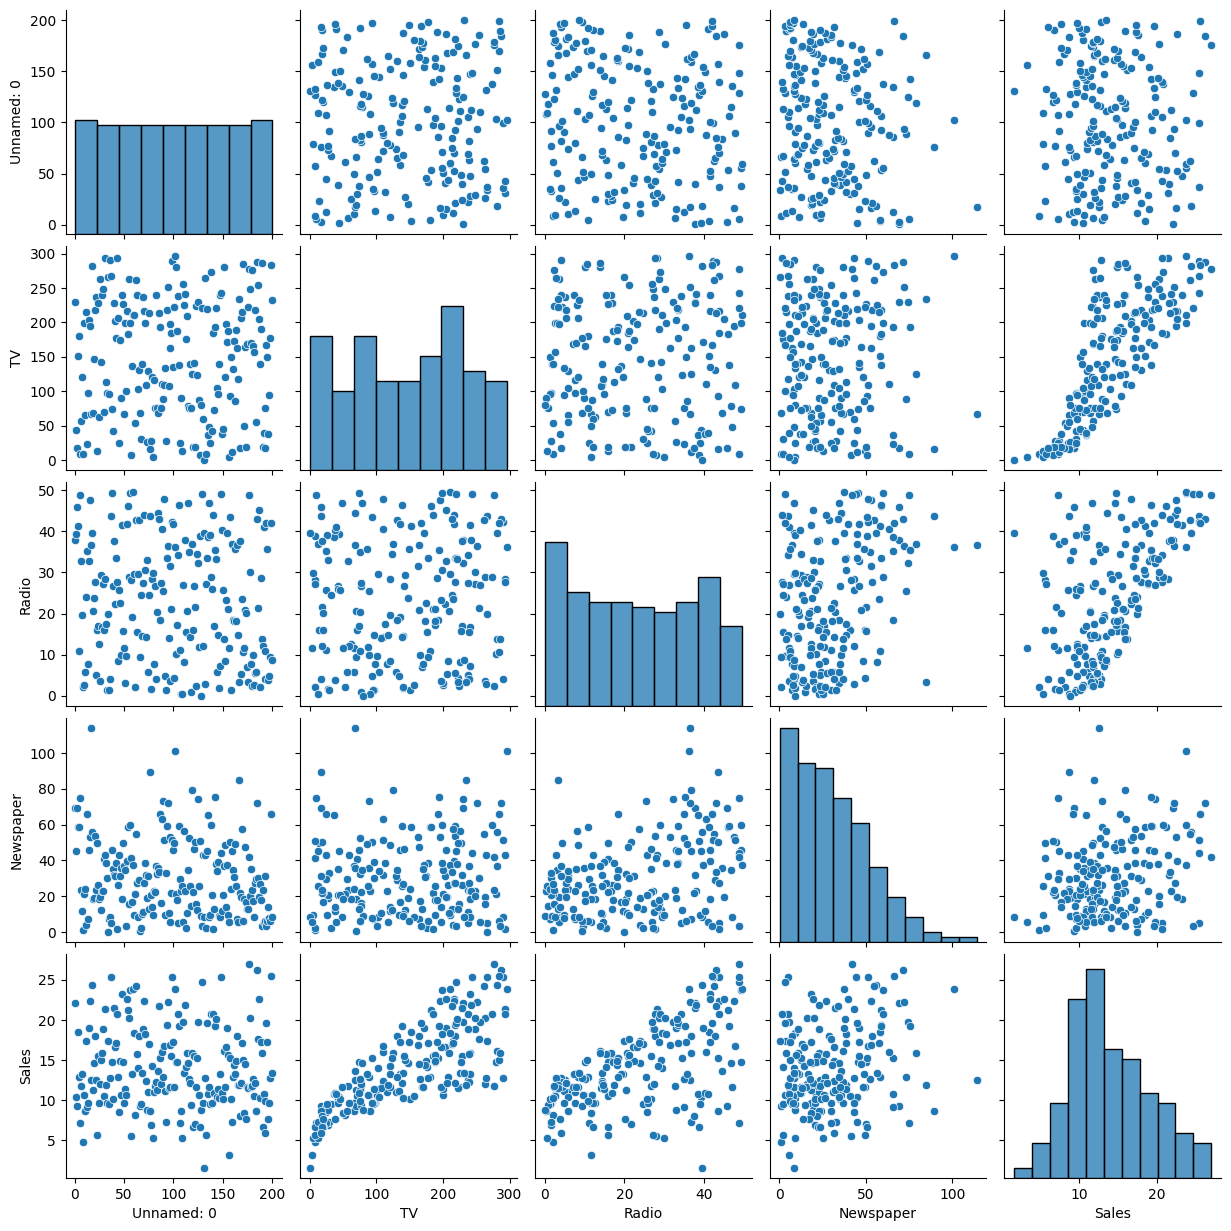

In [37]:
sns.pairplot(sales)

plt.show()

# **Feature Engineering**

In [38]:
sales['Total Advert'] = sales['TV'] + sales['Radio'] + sales['Newspaper']
sales

,Unnamed: 0,TV,Radio,Newspaper,Sales,Total Advert
0,1,230.1,37.8,69.2,22.1,337.1
1,2,44.5,39.3,45.1,10.4,128.9
2,3,17.2,45.9,69.3,9.3,132.4
3,4,151.5,41.3,58.5,18.5,251.3
4,5,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,55.7
196,197,94.2,4.9,8.1,9.7,107.2
197,198,177.0,9.3,6.4,12.8,192.7
198,199,283.6,42.0,66.2,25.5,391.8


# **Machine Learning Model Training & Evaluation**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
from tabulate import tabulate

In [40]:
X = sales.drop(columns='Sales')
y = sales['Sales']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Lasso': Lasso(alpha=1.0),
    'Ridge': Ridge(alpha=1.0)
}

def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append([name, mse, rmse, mae, r2])
    return results

# **Different Models Performance**

In [42]:
results = train_and_evaluate(models, X_train, X_test, y_train, y_test)

table = tabulate(results, headers=['The Models', 'MSE', 'RMSE', 'MAE', 'R2'], tablefmt='grid')
print(table)

+-------------------+----------+----------+----------+----------+
| The Models        |      MSE |     RMSE |      MAE |       R2 |
+===================+==========+==========+==========+==========+
| Linear Regression | 3.199    | 1.78858  | 1.46506  | 0.898649 |
+-------------------+----------+----------+----------+----------+
| SVR               | 5.16663  | 2.27302  | 1.74559  | 0.83631  |
+-------------------+----------+----------+----------+----------+
| Gradient Boosting | 0.942488 | 0.970818 | 0.775271 | 0.97014  |
+-------------------+----------+----------+----------+----------+
| Lasso             | 3.25628  | 1.80452  | 1.48934  | 0.896834 |
+-------------------+----------+----------+----------+----------+
| Ridge             | 3.19902  | 1.78858  | 1.46507  | 0.898649 |
+-------------------+----------+----------+----------+----------+


In [43]:
import random

random.seed(42)
random_samples = sales[['TV','Radio','Newspaper']].sample(10)

random_samples

,TV,Radio,Newspaper
55,198.9,49.4,60.0
41,177.0,33.4,38.7
75,16.9,43.7,89.4
162,188.4,18.1,25.6
177,170.2,7.8,35.2
74,213.4,24.6,13.1
173,168.4,7.1,12.8
148,38.0,40.3,11.9
176,248.4,30.2,20.3
150,280.7,13.9,37.0


In [44]:
random_samples['Total Advert'] = random_samples['TV'] + random_samples['Radio'] + random_samples['Newspaper']
random_samples

,TV,Radio,Newspaper,Total Advert
55,198.9,49.4,60.0,308.3
41,177.0,33.4,38.7,249.1
75,16.9,43.7,89.4,150.0
162,188.4,18.1,25.6,232.1
177,170.2,7.8,35.2,213.2
74,213.4,24.6,13.1,251.1
173,168.4,7.1,12.8,188.3
148,38.0,40.3,11.9,90.2
176,248.4,30.2,20.3,298.9
150,280.7,13.9,37.0,331.6


# **Evaluating Predicted Sales Against Actual Sales**

In [45]:
random_samples = sales.sample(n=10, random_state=np.random.RandomState())

X_random_samples = random_samples.drop(columns='Sales')

actual_sales = random_samples['Sales'].values

predictions_table = []
for name, model in models.items():
    predicted_sales = model.predict(X_random_samples)
    for i in range(len(predicted_sales)):
        variance = actual_sales[i] - predicted_sales[i]
        predictions_table.append([name, i+1, actual_sales[i], predicted_sales[i], variance])


headers = ['Model', 'Sample No.', 'Actual Sales', 'Predicted Sales', 'Variance']
table = tabulate(predictions_table, headers=headers, tablefmt='grid')


print("Table of the Models Used and their Performance:")
print(table)

Table of the Models Used and their Performance:
+-------------------+--------------+----------------+-------------------+------------+
| Model             |   Sample No. |   Actual Sales |   Predicted Sales |   Variance |
+===================+==============+================+===================+============+
| Linear Regression |            1 |           15.7 |          16.6647  | -0.964718  |
+-------------------+--------------+----------------+-------------------+------------+
| Linear Regression |            2 |            8.5 |           9.05356 | -0.553556  |
+-------------------+--------------+----------------+-------------------+------------+
| Linear Regression |            3 |           10.8 |          12.5917  | -1.79172   |
+-------------------+--------------+----------------+-------------------+------------+
| Linear Regression |            4 |           10.7 |           9.25749 |  1.44251   |
+-------------------+--------------+----------------+-------------------+---------

# **Summation of Variances**

In [46]:
model_variances = {}
for name, model in models.items():
    predicted_sales = model.predict(X_random_samples)
    variance = actual_sales - predicted_sales
    model_variances[name] = np.sum(variance)


variance_table = [[name, np.sum(var)] for name, var in model_variances.items()]
headers = ['Models', 'Sum of Variance']
table = tabulate(variance_table, headers=headers, tablefmt='grid')


print("Table of Sum of Variance per Model:")
print(table)

Table of Sum of Variance per Model:
+-------------------+-------------------+
| Models            |   Sum of Variance |
+===================+===================+
| Linear Regression |        -3.71123   |
+-------------------+-------------------+
| SVR               |         0.588146  |
+-------------------+-------------------+
| Gradient Boosting |        -0.0203734 |
+-------------------+-------------------+
| Lasso             |        -3.73477   |
+-------------------+-------------------+
| Ridge             |        -3.71124   |
+-------------------+-------------------+


**Gradient Boosting** model has the least sum of variances which makes it the best performing model for sales prediction on this dataset.